In [13]:
# Import dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_digits()

# Make array representation of labels
y = []
for x in data.target:
    r = [0,0,0,0,0,0,0,0,0,0]
    r[x] = 1
    y.append(r)
x_train, x_test, y_train, y_test = train_test_split(data.images, y, test_size=0.33, random_state=42)


In [ ]:
# Experimenting with data

print(data.target)
print(len(data.target))
print(len(y))
print(len(x_train))

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


<IPython.core.display.Javascript object>


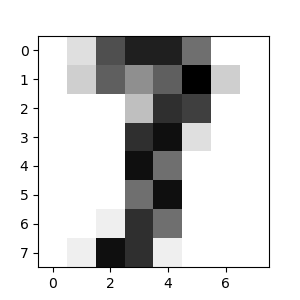

In [18]:

# Test if import works correctly
import numpy as np

i = 4
print(y_train[i])
img = np.reshape(x_train[i], (-1, 8))

%matplotlib notebook
import matplotlib.pyplot as plt 
plt.figure(1, figsize=(3, 3))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [6]:
#parameters
layer_sizes = [64,64,10]
epochs = 100

In [10]:
import numpy as np


# Activation function, should be the logistic function
def afunc(x):
    return 1/(1+np.exp(-x))


# Derivative of the activation function
def afuncDerivative(x):
    return x*(1-x)
    

# Initialization of layers
layers = []
for i in range(len(layer_sizes)):
    layers.append(2*np.random.random((layer_sizes[i],1)) - 1)
    
# Initialization of weights
weights = []
for i in range(1,len(layer_sizes)):
    weights.append(2*np.random.random((layer_sizes[i-1],layer_sizes[i])) - 1)
    
# Training function
def train(data,labels,epochs):
   for x in range(epochs):
        # Calculates the values of each neuron in each layer
        layer_output = []
        layer_output.append(data)
        for i in range(len(weights)):
            layer_output.append(afunc(layer_output[-1].dot(weights[i])))

        # Gradient calculation
        gradients = []
        s1 = (labels-layer_output[-1])
        for x in range(len(weights)-1,-1,-1):
            grad =s1*afuncDerivative(layer_output[x+1])
            gradients.insert(0,grad)
            if x!=0: s1 = gradients[0].dot(weights[x].T)

        # Update weights
        for x in range(len(weights)):
            weights[x] += layer_output[x].T.dot(layer_output[x+1])

    



In [12]:
print(weights[0])
train(x_train,y_train,epochs)
print("second", weights[0])

[[2.69179094e-01 8.22254677e-02 2.62406770e-01 ... 6.65855021e-01
  2.15092663e-01 3.65727089e-01]
 [3.90066167e+04 3.90923271e+04 3.90387253e+04 ... 3.93165270e+04
  3.93998876e+04 3.93700439e+04]
 [6.22512100e+05 6.23334609e+05 6.23528107e+05 ... 6.28011946e+05
  6.28798342e+05 6.27954557e+05]
 ...
 [8.08631051e+05 8.08793269e+05 8.10409402e+05 ... 8.16713161e+05
  8.16800109e+05 8.15138303e+05]
 [2.49480494e+05 2.49490939e+05 2.49793984e+05 ... 2.51951471e+05
  2.52000461e+05 2.51730604e+05]
 [4.22721198e+04 4.22724717e+04 4.22937311e+04 ... 4.26781913e+04
  4.27009562e+04 4.26667615e+04]]
second [[2.69179094e-01 8.22254677e-02 2.62406770e-01 ... 6.65855021e-01
  2.15092663e-01 3.65727089e-01]
 [7.84066167e+04 7.84923271e+04 7.84387253e+04 ... 7.87165270e+04
  7.87998876e+04 7.87700439e+04]
 [1.25131210e+06 1.25213461e+06 1.25232811e+06 ... 1.25681195e+06
  1.25759834e+06 1.25675456e+06]
 ...
 [1.62543105e+06 1.62559327e+06 1.62720940e+06 ... 1.63351316e+06
  1.63360011e+06 1.631938

In [ ]:
# Check weight initialization
for x in weights:
    print(len(x))
    print(len(x[1]))

In [5]:

# Calculates the values of each neuron in each layer
layer_output = []
layer_output.append(x_train)
for i in range(len(weights)):
    layer_output.append(afunc(layer_output[-1].dot(weights[i])))

# Testing lines to be deleted    
#print((str(len(layer_output))+" "+str(len(layer_output[0]))+" "+str(len(layer_output[0][0]))))
#print(str(len(weights))+" "+str(len(weights[1]))+" "+str(len(weights[1][0])))
#for x in range(len(weights)-1,-1,-1):
#    print(x)
    
# Error function to be deleted
error = 1/2*(layer_output[-1]-y_train)**2
sum_error = np.sum(error)

# Gradient calculation
gradients = []
s1 = (y_train-layer_output[-1])
for x in range(len(weights)-1,-1,-1):
    grad =s1*afuncDerivative(layer_output[x+1])
    gradients.insert(0,grad)
    if x!=0: s1 = gradients[0].dot(weights[x].T)


    
# Update weights
for x in range(len(weights)):
    print("layer x: ", layer_output[x].shape)
    print("layer x+1: ", layer_output[x+1].shape)
    print("weights x: ",len(weights[x]))
    print("weights x[x]: ",len(weights[x][x]))

    print("dotproduct: ",layer_output[x].T.dot(layer_output[x+1]).shape)
    weights[x] += layer_output[x].T.dot(layer_output[x+1])
    
# Print layers
for x in layer_output:
    #print(x)
    continue


layer x:  (1203, 64)
layer x+1:  (1203, 64)
weights x:  64
weights x[x]:  64
dotproduct:  (64, 64)
layer x:  (1203, 64)
layer x+1:  (1203, 10)
weights x:  64
weights x[x]:  10
dotproduct:  (64, 10)
